## Excercises on ice sheet modeling at GIA summerschool 2023
© Torsten Albrecht, albrecht@pik-potsdam.de, PIK, 2023

- code snippets are based on [PISM](https://www.pism.io) examples or glaciology literature

### 1 Scaling

The equation of motion reads
$$
\rho_i \frac{d\vec{v}}{dt} = div \, \overleftrightarrow{\sigma} + \vec{f}_g = -grad \, p + div \, \overleftrightarrow{\tau} + \rho_i \vec{g}
$$

with $\rho_i$ the ice density, <br>
$\vec{v}$ the three-dimensional ice velocity vector, <br>
$\overleftrightarrow{\sigma}$ the Cauchy stress tensor, <br>
$p$ the pressure, <br>
$\overleftrightarrow{\tau}$ the deviatoric stress tensor and <br>
$\vec{g}$ the acceleration due to gravity.

For the large ice sheets on Earth we can assume the aspect ratio
$$
\epsilon = \frac{[H]}{[L]} = \frac{[W]}{[U]} = \frac{1\,\text{km}}{1000\,\text{km}} = \frac{1\,\text{m/yr}}{1000\,\text{m/yr}} = \mathcal{O}(10^{-3})
$$

The **Froude number** is a non-dimensial scalar, that compares the acceleration term with the pressure gradient.

#### Q1: What is the horizontal Frounde number for ice sheet scales? Which term of the equation of motion can be neglected?
Hint: 
$$
[g] = 10\,\text{m/s}^2 \approx 10^{16}\,\text{m/yr}^2, \;
[t] = \frac{[L]}{[U]}, \;
[p] = [\rho][g][H]
$$


<div class="alert alert-block alert-info">
<details>
<summary><b>A1:</b> click to show solution</summary>


$$
Fr_h = \frac{ \frac{[\rho] [U]}{[t]} }{ \frac{[p]}{[L]} } = \frac{ \frac{[U^2]}{[L]} }{ \frac{[g]}{[H]} } = \frac{[U^2]}{[L]} = \frac{(10^3 \,\text{m/yr})^2}{10^{16}\,\text{m/yr}^2 \, 10^3 \,\text{m}} \mathcal{O}(10^{-13})
$$

Hence acceleration can be neglected!

$$
\rho_i \frac{d\vec{v}}{dt} \rightarrow 0
$$
    
</details>
</div>

Neglecting acceleration yields the **Stokes flow**

$$
\frac{\partial \sigma_{xx}}{\partial x} + \frac{\partial \sigma_{xy}}{\partial y} + \frac{\partial \sigma_{xz}}{\partial z} = 0 ,
$$
$$
\frac{\partial \sigma_{xy}}{\partial x} + \frac{\partial \sigma_{yy}}{\partial y} + \frac{\partial \sigma_{yz}}{\partial z} = 0 , 
$$
$$
 \frac{\partial \sigma_{zz}}{\partial z} = \rho \, g ,
$$

with 6 independent Cauchy stress terms (symmetric tensor)

#### Q1*: What is the Froude number for the vertical dimension?
(Questions with * are voluntary)

<div class="alert alert-block alert-info">
<details>
  <summary><b>A1*:</b> click to show solution</summary>
$$
Fr_v = \epsilon^2 Fr_h = \mathcal{O}(10^{−19}).
$$
</details>
</div>

### 2 Minimal glacier model

Assuming "perfect plasticity" the stress in the ice cannot exceed the yield stress $\tau_0$, and basal drag must be equal to $\tau_0$. Hence, driving stress equals yield stress

$$
\rho_i g H \left|\frac{\partial h}{\partial x}\right| = \tau_0 .
$$


#### Q2: What would be the maximum thickness of an (one dimensional) ice sheet of length $L$ resting on a flat bed? 

Hint: $\tau_0 = 50 \text{k Pa}$, $L=1000\text{km}$ and $\frac{\partial h}{\partial x} = \frac{\partial H}{\partial x}$ for $\frac{\partial b}{\partial x} = 0$

<div class="alert alert-block alert-info">
<details>
  <summary><b>A2:</b> click to show solution</summary>
    
Let's consider the part for $dh /dx > 0$ from $x=0$ to the summit at $x=L/2$ 

$$
\frac{d(H^2)}{dx} = \frac{2 \tau_0}{\rho_i g}
$$

and integrate from $0$ to $x$

$$
H(0)^2 - H(x)^2 = \frac{2 \tau_0}{\rho_i g} (x)
$$

with $H(0) = H(L) = 0$ we find
$$
H(x) = \sqrt{\frac{2 \tau_0}{\rho_i g} (x)}, \;0 \leq x \leq L/2
$$

and 

$$
H(x) = \sqrt{\frac{2 \tau_0}{\rho_i g} (L-x)}, \;L/2 \leq x \leq L
$$

and $H(L/2) = \sqrt{\frac{2 \tau_0}{\rho_i g} \frac{L}{2}}$ 

which yields a maximum thickness of $2.4\text{km}$ for $1000\text{km}$.
    
</details>
    </div>

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

import matplotlib.pylab as plt
from matplotlib import cm, colors
import netCDF4 as nc
import numpy as np

Hmax 2379.7 m


(0.0, 1000.0)

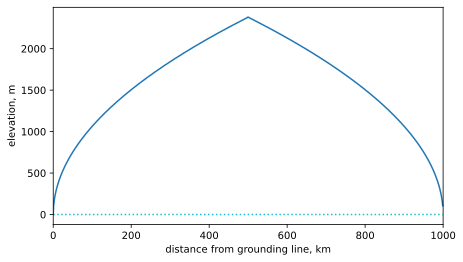

In [2]:
# setting parameters
Lext = 1000e3 #m
tau0 = 50e3 #Pa
g = 9.81 #m/s2
rhoi = 900 #kg/m3 

H_max = (tau0*Lext/(rhoi*g))**0.5
print('Hmax',np.around(H_max,decimals=1),'m')
#print(2*tau0/(rhoi*g))

#ice shelf geometry and spatial resolution
dx = 1.0  # km
xl = np.arange(0, Lext, dx*1e3)  #m
xkm = xl * 1e-3 # xl in km
#print(len(xl))


Hplast_left = (2.0*tau0*xl/(rhoi*g))**0.5
Hplast_right = (2.0*tau0*(Lext-xl)/(rhoi*g))**0.5

#print(Hplast_left)

################################################################
fig = plt.figure(10,figsize=(7,4))
ax1 = fig.add_subplot(1,1,1)

# bottom
ax1.plot(xkm, np.zeros_like(xl), ls='dotted', color='C9')

ax1.plot(xkm[xl<Lext/2.0], Hplast_left[xl<Lext/2.0], color='C0')
ax1.plot(xkm[xl>=Lext/2.0], Hplast_right[xl>=Lext/2.0], color='C0')

# ocean water
#ax.plot(x, lan, color='C1')
#ax1.fill_between(x,-1e3,lan,color='C0')

ax1.set_xlabel('distance from grounding line, km')
ax1.set_ylabel('elevation, m')
ax1.set_xlim(0,Lext*1e-3)


#### Q2*: What would be the maximum surface elevation, if the ice sheet load was in equilibrium with the solid Earth underneath?

$$
H = \left(1-\frac{b}{h}\right) h = \left(1-\frac{\rho_i}{\rho_m - \rho_i}\right) h  = \left(1-\zeta\right) h
$$


Hint: Assume a mantle density of $\rho_m = 3300 \text{kg m}^{-3}$

<div class="alert alert-block alert-info">
<details>
  <summary><b>A2*:</b> click to show solution</summary>

$$
H(x) = \sqrt{\frac{2 \tau_0 (1-\zeta)}{\rho_i g} (x)}, \;0 \leq x \leq L/2
$$
 
 
$$
h(x) = \sqrt{\frac{2 \tau_0}{\rho_i g (1-\zeta)} (x)}, \;0 \leq x \leq L/2
$$

The ice sheet becomes thicker with up to 3.0km at the summit, while surface elevation is lower with about 1.9km.
    
</details>
    </div>

0.375
hmax 1881.3 m
Hmax 3010.2 m


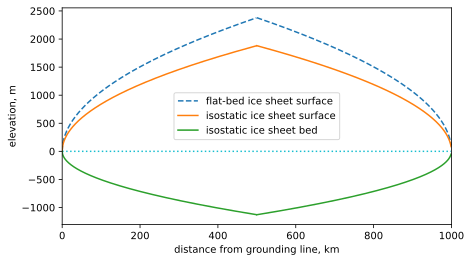

In [3]:
rhom = 3300.0
zeta = rhoi/(rhom-rhoi)
print(zeta)

Hiso_left = (2.0*tau0*xl/(rhoi*g*(1.0-zeta)))**0.5
Hiso_right = (2.0*tau0*(Lext-xl)/(rhoi*g*(1.0-zeta)))**0.5

hiso_left = (2.0*tau0*xl*(1.0-zeta)/(rhoi*g))**0.5
hiso_right = (2.0*tau0*(Lext-xl)*(1.0-zeta)/(rhoi*g))**0.5

Hiso_max = (tau0*Lext/(rhoi*g*(1.0-zeta)))**0.5
hiso_max = (tau0*Lext*(1.0-zeta)/(rhoi*g))**0.5

print('hmax',np.around(hiso_max,decimals=1),'m')
print('Hmax',np.around(Hiso_max,decimals=1),'m')

################################################################
fig = plt.figure(10,figsize=(7,4))
ax1 = fig.add_subplot(1,1,1)

# bottom
ax1.plot(xkm, np.zeros_like(xl), ls='dotted', color='C9')

ax1.plot(xkm[xl<Lext/2.0], Hplast_left[xl<Lext/2.0], color='C0',ls='dashed',label='flat-bed ice sheet surface')
ax1.plot(xkm[xl>=Lext/2.0], Hplast_right[xl>=Lext/2.0], color='C0',ls='dashed')

ax1.plot(xkm[xl<Lext/2.0], hiso_left[xl<Lext/2.0], color='C1',label='isostatic ice sheet surface')
ax1.plot(xkm[xl>=Lext/2.0], hiso_right[xl>=Lext/2.0], color='C1')

ax1.plot(xkm[xl<Lext/2.0], hiso_left[xl<Lext/2.0]-Hiso_left[xl<Lext/2.0], color='C2',label='isostatic ice sheet bed')
ax1.plot(xkm[xl>=Lext/2.0], hiso_right[xl>=Lext/2.0]-Hiso_right[xl>=Lext/2.0], color='C2')

ax1.set_xlabel('distance from grounding line, km')
ax1.set_ylabel('elevation, m')
ax1.set_xlim(0,Lext*1e-3)
ax1.legend()

### 3 Unbuttressed ice shelves

The first of the two equations of motion of a vertically integrated ice shelf 
in Shallow Shelf Approximation (SSA) reads

$$
4 \frac{\partial}{\partial x}\left(\tilde{\nu} \frac{\partial u}{\partial x} \right) + 
2 \frac{\partial}{\partial x}\left(\tilde{\nu} \frac{\partial v}{\partial y} \right) +
  \frac{\partial}{\partial y}\left(\tilde{\nu} (\frac{\partial u}{\partial y} +  \frac{\partial v}{\partial x})\right) =
\rho \, g \, H \frac{\partial h}{\partial x}.
$$

This is a non-linear second order elliptical boundary value problem for the depth-independent horizontal velocities $u$ and $v$ (Morland 1987, [MacAyeal 1989](https://doi.org/10.1029/JB094iB04p04071), [Weis et al. 1999](https://doi.org/10.1007/s001610050102), [Schoof 2006](https://doi.org/10.1017/S0022112006009591)),

with ice surface elevation (flotation condition)

$$
h = \left(1 - \frac{\rho_i}{\rho_{sw}}  \right) H
$$

and ice viscosity
$$
\tilde{\nu} = \int_b^h \nu \, dz
$$

and based on Nye's generalization of Glen's flow law ([Nye, 1953](https://doi.org/10.3189/S0022143000033967); [Glen, 1958](http://go.owu.edu/~chjackso/Climate/papers/Glen_1958_The%20flow%20law%20of%20ice.pdf)]), for $n=3$ the flow law exponent

$$
2 \, \nu = A(T)^{-1/n} \left|\frac{\partial u}{\partial x}\right|^{(1-n)/n} = B_0 \left|\frac{\partial u}{\partial x}\right|^{(1-n)/n}
$$

with $A(T)$ the (generally temperature-dependent) ice softness, and $B_0$ the constant ice hardness. This constitutive equation means that the deformation rate of the ice increases with the power $n$ of the applied stress.



For an ice shelf, which flow along the x-direction (no lateral variation in y-direction), this simplifies to

$$
4 \frac{\partial}{\partial x}\left(\tilde{\nu} \frac{\partial v_x}{\partial x} \right) =
\rho \, g \, H \frac{\partial h}{\partial x}.
$$

### Q3* Derive the analytical solution for the steady-state freely floating ice shelf thickness H, without melting or accumulation
Hint:

The ice thickness evolution equation for net accumulation (or ablation) M is given by

$$
\frac{\partial H}{\partial t} = -\frac{\partial }{\partial x}\left( u H \right) + M
$$



<div class="alert alert-block alert-info">
<details>
  <summary><b>A3*:</b> click to show solution</summary>

Integration yields
$$
4 \tilde{\nu} \frac{\partial u}{\partial x}  =
\frac{1}{2} \rho \, g \, H^2 \left(1 - \frac{\rho_i}{\rho_{sw}}  \right) .
$$

Inserting the viscosity from Glen's flow law
$$
2 B_0 H \left|\frac{\partial u}{\partial x}\right|^{1+\frac{1-n}{n}}  = 2 B_0 H \left|\frac{\partial u}{\partial x}\right|^{\frac{1}{n}} =
\frac{1}{2} \rho \, g \, H^2 \left(1 - \frac{\rho_i}{\rho_{sw}}  \right) .
$$

And some rearranging
$$
\frac{\partial u}{\partial x}  =
\left[\frac{\rho \, g}{4 B_0}  \left(1 - \frac{\rho_i}{\rho_{sw}}  \right) H^2 \right]^n = C H^{n+2}.
$$

Assume steady state $\frac{\partial H}{\partial t} \rightarrow 0$ and $M=0$.

$$
\frac{\partial }{\partial x}\left( u H \right) = 0 =H \frac{\partial u}{\partial x}+   u \frac{\partial H}{\partial x}
$$

and 

$$
\frac{\partial H}{\partial x} = -\frac{H}{u} \frac{\partial u}{\partial x} = -\frac{C H^{n+1}}{u} = -\frac{C H^{n+2}}{Q_0}
$$

with the (one-dimensional horizontal) ice flux $Q_0 = u_0 H_0 = u H$.

</details>
    </div>

Integration from the grounding line at $x_{gl}=0$ to position $x$ yields
$$
H(x) = \left( \frac{(n+1) C}{Q_0}x  + \frac{1}{H_0^{n+1}}  \right)^{-\frac{1}{n+1}}
$$
and 
$$
u(x) = \frac{Q_0}{H(x)} = Q_0 \left( \frac{(n+1) C}{Q_0}x  + \frac{1}{H_0^{n+1}}  \right)^{\frac{1}{n+1}}
$$



This is the van der Veen analytical solution (see [van der Veen 1983, 1999, 2013, "Fundamentals of Glacier Dynamics"](https://doi.org/10.3189/2014JoG13J214))

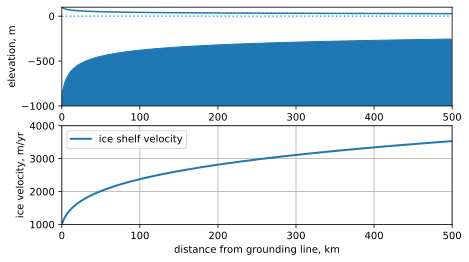

In [4]:
#see also pism/examples/marine/flowline/plot_flowline.py

# ice flux at grounding line
U0 = 1000  # m/yr
H0 = 1000  # m

spa=60*60*365.25*24 # s per year

# densities
#rhoi=910.0
rhoi=900.0 #MISMIP
rhofw=1.0e3
#rhosw=1028.0
rhosw=rhofw # MISMIP

n = 3.0 # glen's flow law exponent
#B0 = 1.9e8 #Pa s^1/3
#g=9.81 #kg/s2
#C = (rhoi * g * (1.0 - rhoi/rhosw) / (4 * B0))**n
#print(C)
C = 2.4511e-18  #kg m-3 m2 s-1 


#ice shelf geometry and spatial resolution
L = 5e2 #km
dx = 1.0  # km
x = np.arange(0, L, dx)
xm = x * 1e3 # x in m

######################################################

# ice thickness and velocity analytical solution
Han = (xm * (n+1) * C / (U0 * H0 / spa)  +  H0 ** (-(n+1))) ** (-1/(n+1))
Uan = U0 * H0 / Han

# upper and lower surface of floating ice shelf
han = (1.0-rhoi/rhosw) * Han
lan = han - Han

################################################################
fig = plt.figure(1,figsize=(7,4))
ax1 = fig.add_subplot(2,1,1)

# sea level 0
ax1.plot(x, np.zeros_like(x), ls='dotted', color='C9')

ax1.plot(x, han, color='C0')

# ocean water
#ax.plot(x, lan, color='C1')
ax1.fill_between(x,-1e3,lan,color='C0')

ax1.set_xlabel('distance from grounding line, km')
ax1.set_ylabel('elevation, m')
ax1.set_xlim(0,L)
ax1.set_ylim(-H0,H0/10.0)

ax2 = fig.add_subplot(2,1,2)
ax2.plot(x, Uan, color='C0', linewidth=2,label='ice shelf velocity')
ax2.set_ylabel('ice velocity, m/yr')
ax2.set_xlabel('distance from grounding line, km')
ax2.set_xlim([0, L])
ax2.set_ylim([U0, 4*U0])
plt.grid(True)
plt.legend()


#### Q3: Estimate distance to grounding line

Robin and Cleo are on field work on an Antarctic ice shelf. They have drilled an ice core of 400m length all the way down to the ice shelf base to take measurements of the melting below (CTD: temperature and salinity profiles). 

They measure no effective melting or refreezing. Also the katabatic winds blow away all the snow on the ice shelf. Cleo remebers from sattelite imagery and ground-penetrating radar, that the ice flow across the grounding line has about 1km/yr speed, and that the bed lays about 1km below the ice surface. In an old hand book on glacier dynamics they found an analytical solution for the ice shelf thickness:

$$
H(x) = \left( \frac{(n+1) C}{H_0 u_0}x  + \frac{1}{H_0^{n+1}}  \right)^{-\frac{1}{n+1}}
$$

The field work team would like to take samples of the sub-glacial till in the grounding zone. How far is the grounding line, assuming that the ice shelf is freely floating? 
And what happens, if weather conditions delay the transect by one month.

Hint: $C(B0) = 2.4511\times 10^{-18} \text{m}^{1/n} \text{s}^{-1} $ for  $n=3$ and $g=9.81 \,\text{kg s}^{-2}$

  ``` python
xc = (Hc ** (-(n+1.0)) - H0 ** (-(n+1))) * U0 * H0 / ((n+1) * C * spa) * 1e-3
  ```
  
<!--
Hint: $C(B0) = 1.5678\times 10^{-18} \text{m}^{1/n} \text{s}^{-1} $ for $B0 = 1.9 \times 10^8 \text{Pa} \,\text{s}^{1/n}$, $n=3$ and $g=9.81 \,\text{kg s}^{-2}$
-->


<div class="alert alert-block alert-info">
<details>
  <summary><b>A3:</b> click to show solution</summary>

$$
x_c = \frac{u_0 H_0}{(n+1) C} \left( H_{c}^{-(n+1)} - H_0^{-(n+1)}  \right)
$$

with $u_0 = 1\,\text{km/yr}$, $H_0 = 1\,\text{km}$, $H_c = 400\,\text{m}$, $n=3$


Grounding line is about $123 \text{km}$ upstream. 
The drill camp drifts with $2.5 \text{km/yr}$ downstream. After one month they are already more than $208 \text{m}$ further away.
    
</details>
    </div>

In [5]:
Hc = 400  # m, calving thickness
n = 3.0

# exact van der veen solution
xc = (Hc ** (-(n+1.0)) - H0 ** (-(n+1))) * U0 * H0 / ((n+1) * C * spa) * 1e-3
print(np.around(xc,decimals=1),'km')

Uc = U0 * H0 / Hc
print(np.around(Uc,decimals=1),'m/yr')

dx = Uc /12.0
print(np.around(dx,decimals=1),'m')

123.0 km
2500.0 m/yr
208.3 m


#### Q3b: Glen's flow law parameter

Robin finds a new observational study, which suggest, that Glen's flow law parameter for ice shelf flow should be rather $n=3.2$.

What would that mean for the distance to the grounding line? 

<div class="alert alert-block alert-info">
<details>
<summary><b>A3b:</b> click to show solution</summary>

The grounding line would be only about $36 \text{km}$ away. The drift speed would be the same as before.
    
</details>
</div>

35.5 km


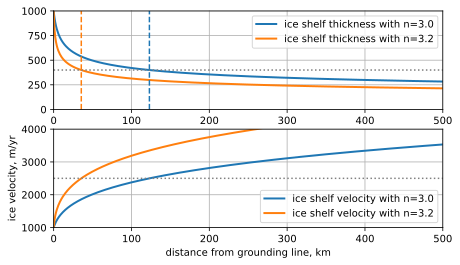

In [6]:
n = 3.2
Cn = C
#Cn = (rhoi * g * (1.0 - rhoi/rhosw) / (4 * B0))**n
xcg = (Hc ** (-(n+1.0)) - H0 ** (-(n+1))) * U0 * H0 / ((n+1) * Cn * spa) * 1e-3
print(np.around(xcg,decimals=1),'km')

Hang = (xm * (n+1) * Cn / (U0 * H0 / spa)  +  H0 ** (-(n+1))) ** (-1/(n+1))
Uang = U0 * H0 / Hang


############################################################################

fig = plt.figure(2,figsize=(7,4))

ax1 = fig.add_subplot(2,1,1)
ax1.plot(x, Han, color='C0', linewidth=2,label='ice shelf thickness with n=3.0')
ax1.plot(x, Hang, color='C1', linewidth=2,label='ice shelf thickness with n=3.2')
ax1.set_xlim([0, L])
ax1.set_ylim([0, H0])#
ax1.axhline(Hc,color='C7',ls="dotted")
ax1.axvline(xc,color='C0',ls="dashed")
ax1.axvline(xcg,color='C1',ls="dashed")
ax2.set_ylabel('ice thickness, m')
ax2.set_xlabel('distance from grounding line, km')
plt.grid(True)
plt.legend()

ax2 = fig.add_subplot(2,1,2)
ax2.plot(x, Uan, color='C0', linewidth=2,label='ice shelf velocity with n=3.0')
ax2.plot(x, Uang, color='C1', linewidth=2,label='ice shelf velocity with n=3.2',ls='solid')
ax2.axhline(Uc,color='C7',ls="dotted")
ax2.set_xlim([0, L])
ax2.set_ylim([U0, 4*U0])
ax2.set_ylabel('ice velocity, m/yr')
ax2.set_xlabel('distance from grounding line, km')

plt.grid(True)
plt.legend()


#### Q3c*: Melting and accumulation

There is an analytical solution if accumulation (M>0) or melt (M<0) is considered:

$$
H_p(x) = \left[ \frac{C}{M} - \frac{ u_0^{n+1}\left(\frac{C}{M}H_0^{n+1}-1 \right)}{(M x + u_0 H_0)^{n+1}}   \right]^{\frac{-1}{n+1}} , M>0
$$

and 

$$
H_n(x) = \left[ -\frac{C}{M} + \frac{ u_0^{n+1}\left(\frac{C}{M}H_0^{n+1}+1 \right)}{(-M x + u_0 H_0)^{n+1}}   \right]^{\frac{-1}{n+1}} , M<0
$$

How far would be the grounding line in the case of $1\text{m/yr}$ melt or accumulation?

<div class="alert alert-block alert-info">
<details>
<summary><b>A3c*:</b> click to show solution</summary>

Rearranging yields

$$
x_p = -\frac{u_0 H_0}{M} + \frac{1}{M} \left[  \frac{ u_0^{n+1}\left(\frac{C}{M}H_0^{n+1}-1 \right)}{\left( H_c^{-(n+1)} -\frac{C}{M}\right) }  \right]^{\frac{1}{n+1}} , M>0
$$

and 

$$
x_n = \frac{u_0 H_0}{M} -\frac{1}{M} \left[  \frac{ u_0^{n+1}\left(\frac{C}{M}H_0^{n+1}+1 \right)}{\left( H_c^{-(n+1)} +\frac{C}{M}\right) }  \right]^{\frac{1}{n+1}} , M<0
$$

The grounding line distance would be $188\text{km}$ in the case of accumulation and $94\text{km}$ in case of melt.
</details>
</div>

M=1m/yr: 188.3 km
M=-1m/yr: 94.2 km


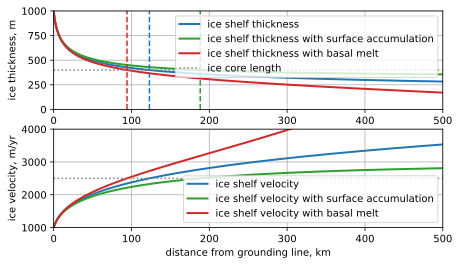

In [7]:
n = 3.0
M = 1.0/spa #m/s

H1p = (U0/spa)**(n+1.0) * ( (C/M * H0**(n+1.0)) - 1.0 )
H1n= (U0/spa)**(n+1.0) * ( (C/M * H0**(n+1.0)) + 1.0 )

H2p = ( M * xm + (U0 * H0 / spa) )**(n+1.0)
Hanp = ( C/M - ( H1p / H2p ) ) ** (-1.0/(n+1.0))
Uanp = (U0 * H0 + M * xm) / Hanp[:]

H2n = ( -M * xm + (U0 * H0 / spa) )**(n+1.0)
Hann = ( -C/M + ( H1n / H2n ) ) ** (-1.0/(n+1.0))
Uann = (U0 * H0 - M * xm) / Hann[:]

H3p = (Hc**(-(n+1))- C/M) #
H3n = (Hc**(-(n+1))+ C/M) #

xcp = (- U0 * H0 /spa  + ((-H1p / H3p) ** (1.0/(n+1.0))) ) / M * 1e-3 #km
print('M=1m/yr:',np.around(xcp,decimals=1),'km')

xcn = ( U0 * H0 /spa  - ((H1n / H3n) ** (1.0/(n+1.0))) ) / M * 1e-3 #km
print('M=-1m/yr:',np.around(xcn,decimals=1),'km')


############################################################################

fig = plt.figure(3,figsize=(7,4))
ax1 = fig.add_subplot(2,1,1)

ax1.plot(x, Han, color='C0', linewidth=2,label='ice shelf thickness')
ax1.plot(x, Hanp, color='C2', linewidth=2,label='ice shelf thickness with surface accumulation')

#Hcr = ( M/C ) ** (1.0/(n+1.0))
#ax1.axhline(Hcr,color='C2',ls="dashed") #Hcr

#Lcr = ( H0*U0/spa / M) *1e-3
#ax1.plot(x[x<Lcr], Hanp2[x<Lcr], color='C3', linewidth=2,label='ice shelf thickness with basal melt')
#ax1.axvline( Lcr,color='C3',ls="dashed") #Lcr

ax1.plot(x, Hann, color='C3', linewidth=2,label='ice shelf thickness with basal melt')
ax1.set_xlim([0, L])
ax1.set_ylim([0, H0])
#ax1.set_ylim([350, 450])
ax1.axhline(Hc,color='C7',ls="dotted",label='ice core length')

ax1.axvline(xc,color='C0',ls="dashed")
ax1.axvline(xcp,color='C2',ls="dashed")
ax1.axvline(xcn,color='C3',ls="dashed")
ax1.set_xlabel('distance from grounding line, km')
ax1.set_ylabel('ice thickness, m')
plt.grid(True)
ax1.legend()


ax2 = fig.add_subplot(2,1,2)
ax2.plot(x, Uan, color='C0', linewidth=2,label='ice shelf velocity')
ax2.plot(x, Uanp, color='C2', linewidth=2,label='ice shelf velocity with surface accumulation')
ax2.plot(x, Uann, color='C3', linewidth=2,label='ice shelf velocity with basal melt')
ax2.axhline(Uc,color='C7',ls="dotted")
ax2.set_xlim([0, L])
ax2.set_ylim([U0, 4*U0])
ax2.set_ylabel('ice velocity, m/yr')
ax2.set_xlabel('distance from grounding line, km')
plt.grid(True)
ax2.legend()


(-1000.0, 100.0)

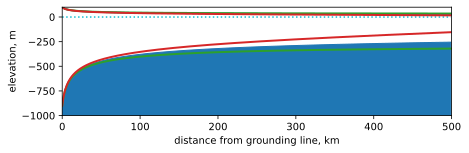

In [8]:
# upper and lower surface of ice shelf
han = (1.0-rhoi/rhosw) * Han
lan = han - Han

hanp = (1.0-rhoi/rhosw) * Hanp
lanp = hanp - Hanp

hann = (1.0-rhoi/rhosw) * Hann
lann = hann - Hann


#######################################################

fig = plt.figure(4,figsize=(7,2))
ax = fig.add_subplot(1,1,1)

# sea level 0
ax.plot(x, np.zeros_like(x), ls='dotted', color='C9')
ax.plot(x, han, color='C0')

# ocean water
#ax.plot(x, lan, color='C1')
ax.fill_between(x,-1e3,lan,color='C0')

ax.plot(x, hanp, color='C2', linewidth=2,label='ice shelf velocity with surface accumulation')
ax.plot(x, lanp, color='C2', linewidth=2)

ax.plot(x, hann, color='C3', linewidth=2,label='ice shelf velocity with surface accumulation')
ax.plot(x, lann, color='C3', linewidth=2)

ax.set_xlabel('distance from grounding line, km')
ax.set_ylabel('elevation, m')

ax.set_xlim(0,L)
ax.set_ylim(-1000,100)


### 4 Marine ice sheet instability

There is a whole theory on MISI since 50 years ([Weertman 1974](https://doi.org/10.3189/S0022143000023327)), in particular for unbuttressed ice sheets and ice shelves. [Schoof 2007](https://doi.org/10.1029/2006JF000664) came up with a semianalytical solution for the variational problem, with the flux at the grounding line

$$
Q(x_g) \propto H(x_g)^{4.75}
$$



Consider a marine ice sheet resting on an overdeepende bed (typical for West Antarctic Ice Sheet):

In [9]:
# following pism/examples/mismip/mismip2d

# ice softness
A3b4 = 5.0e-26
#A3b4 = 1.0e-26

#sliding coefficient
Csl = 7.624e6

#mode 2
N = 1500

# length
Lm = 1800e3
x = np.linspace(-Lm, Lm, 2 * N + 1)

# convert x to kilometers
xkm = x/1e3

#calving_front
xcf = 1750e3

def bed(x):
    #"Bed depth below sea level. (-b(x) = topg(x))"
    xx = x / 7.5e5
    return -(729. - 2184.8 * xx ** 2. + 1031.72 * xx ** 4. - 151.72 * xx ** 6.)

def M():
    #"Accumulation rate (m/s)"
    return 0.3 / spa

def b_slope(x):
    #"""The x-derivative of b(experiment, x)."""
    xx = x / 7.5e5
    return -(- 2184.8 * (2. / 7.5e5) * xx
             + 1031.72 * (4. / 7.5e5) * xx ** 3.
             - 151.72 * (6. / 7.5e5) * xx ** 5.)

def g():
    #"""Acceleration due to gravity. (Table 2 on page 19 of mismip_4.pdf
    #uses this value, i.e. g = 9.8 m s-2.)"""
    return 9.81

def m():
    #"Sliding law exponent"
    return 1 / 3.0
    #return 1.0

def n():
    #"Glen exponent"
    return 3.0


def cold_function(x, sl, A0 , theta=0.0):
    """Evaluates function whose zeros define x_g in 'cold' steady marine sheet problem."""
    r = rhoi / rhosw
    h_f = r ** (-1.) * (bed(x)+sl)
    b_x = b_slope(x)
    s = M() * x
    rho_g = rhoi * g()
    return (theta * M()
            + Csl * s ** (m() + 1.0) / (rho_g * h_f ** (m() + 2.))
            - theta * s * b_x / h_f
            - A0 * (rho_g * (1.0 - r) / 4.0) ** n() * h_f ** (n() + 1.0))


def x_g(sl, xi, A0, theta=0.0):
    """Computes the theoretical grounding line location using Newton's method."""

    # set the initial guess
    x = xi*1e3 #m

    delta_x = 10.  # Finite difference step size (metres) for gradient calculation
    tolf = 1.e-4  # Tolerance for finding zeros
    eps = np.finfo(float).eps
    normf = tolf + eps
    toldelta = 1.e1                     # Newton step size tolerance
    dx = toldelta + 1.0

    # this is just a shortcut
    def F(x):
        return cold_function(x, sl, A0, theta)

    while (normf > tolf) or (abs(dx) > toldelta):
        f = F(x)
        normf = abs(f)
        grad = (F(x + delta_x) - f) / delta_x
        dx = -f / grad
        x = x + dx

    return x


def thickness(sl, x, xi, A0, theta=0.0):
    #"""Compute ice thickness for x > 0.
    #"""
    # compute the grounding line position
    xg = x_g(sl, xi, A0, theta)

    def surface(h, x):
        b_x = b_slope(x)
        rho_g = rhoi * g()
        s = M() * np.abs(x)
        return b_x - (Csl / rho_g) * s ** m() / h ** (m() + 1)

    # extract the grounded part of the grid
    x_grounded = x[x < xg]

    # We will integrate from the grounding line inland. odeint requires that
    # the first point in x_grid be the one corresponding to the initial
    # condition; append it and reverse the order.
    x_grid = np.append(xg, x_grounded[::-1])

    # use thickness at the grounding line as the initial condition
    h_f = bed(xg) * rhosw / rhoi

    import scipy.integrate
    thk_grounded = scipy.integrate.odeint(surface, [h_f], x_grid, atol=1.e-9, rtol=1.e-9)

    # now 'result' contains thickness in reverse order, including the grounding
    # line point (which is not on the grid); discard it and reverse the order.
    thk_grounded = np.squeeze(thk_grounded)[:0:-1]

    # extract the floating part of the grid
    x_floating = x[x >= xg]

    # compute the flux through the grounding line
    q_0 = M() * xg

    # Calculate ice thickness for shelf from van der Veen (1986)
    r = rhoi / rhosw
    rho_g = rhoi * g()
    numer = h_f * (q_0 + M() * (x_floating - xg))
    base = q_0 ** (n() + 1) + h_f ** (n() + 1) * ((1 - r) * rho_g / 4) ** n() * A0 \
        * ((q_0 + M() * (x_floating - xg)) ** (n() + 1) - q_0 ** (n() + 1)) / M()
    thk_floating = numer / (base ** (1.0 / (n() + 1)))

    x_nonnegative = x[x >= 0]
    thk_nonnegative = np.r_[thk_grounded, thk_floating]
    thk_nonnegative = thk_nonnegative[x >= 0]
    thk_nonnegative[x_nonnegative > xcf] = 0
    
    thk = np.zeros_like(x)
    thk[x >= 0] = thk_nonnegative
    thk[x < 0] = thk_nonnegative[:0:-1]
    
    return thk



x_g: 1412.2 km


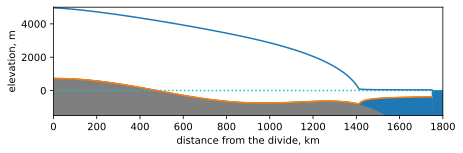

In [10]:

def plot_mismip2d(topg,thk):

    # grounded / floating mask
    mask = np.ones_like(topg)*2 #grounded
    mask[-rhoi/rhosw*thk>topg]=3 # floating
    mask[thk==0]=4 # ice free ocean

    # surface elevation
    usurf = topg + thk
    usurf[mask>=3] = (1.0-rhoi/rhosw) * thk[mask>=3]
    usurf = np.ma.array(usurf, mask=mask == 4)

    # sub surface elevation
    lsurf = topg.copy()
    lsurf[mask == 3] = -rhoi / rhosw * thk[mask == 3]
    lsurf = np.ma.array(lsurf, mask=mask == 4)

    #######################################


    fig = plt.figure(12,figsize=(7,2))
    ax = fig.add_subplot(1,1,1)

    # sea level 0
    ax.plot(xkm, np.zeros_like(xkm), ls='dotted', color='C9')
    ax.plot(xkm, usurf, color='C0')

    # bedrock
    #ax.plot(xkm, topg, color='black')
    ax.fill_between(xkm,-1500,topg,color='C7')

    # ocean water
    ax.plot(xkm, lsurf, color='C1')
    ax.fill_between(xkm,topg,lsurf,color='C0')
    ax.fill_between(xkm[ ((mask==4) & (xkm<0)) ],topg[ ((mask==4) & (xkm<0)) ],0,color='C0')
    ax.fill_between(xkm[ ((mask==4) & (xkm>0)) ],topg[ ((mask==4) & (xkm>0)) ],0,color='C0')

    ax.set_xlabel('distance from the divide, km')
    ax.set_ylabel('elevation, m')

    #_, _, ymin, ymax = ax.axis(xmin=xkm.min(), xmax=xkm.max())
    _, _, ymin, ymax = ax.axis(xmin=0.0, xmax=xkm.max())
    ax.set_ylim(-1500,5000)

####################################################
    
sl = 0.0
xi = 1370.0

topg = -bed(x)-sl
thk = thickness(sl, x, xi, A3b4 , theta=0.0)
    
print('x_g:',np.around(x_g(sl, xi, A3b4 , theta=0.0)*1e-3,decimals=1),'km')

plot_mismip2d(topg,thk)


This marine ice sheet system is multistable, so if you select a different initial quess for $x_i$ you end up in a different state.

x_g: 923.1 km


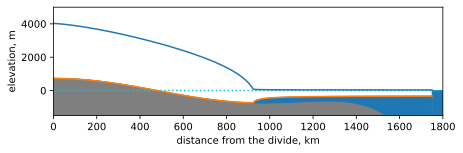

In [11]:
sl = 0.0
xi = 900.0

topg = -bed(x)-sl
thk = thickness(sl, x, xi, A3b4 , theta=0.0)
    
print('x_g:',np.around(x_g(sl, xi, A3b4 , theta=0.0)*1e-3,decimals=1),'km')

plot_mismip2d(topg,thk)


#### Q4: What (global mean) sea-level rise would ne required to initiate a MISI?

Hint: You may adjust the initial quess $x_i$ to achieve convergence to a solution...

<div class="alert alert-block alert-info">
<details>
<summary><b>A4:</b> click to show solution</summary>

In this case a sea level rise above $160\text{m}$ would trigger the marine ice sheet sdystem to tip into a different state.
</details>
</div>

In [12]:
for sl in range(0,200,10):
 
    xi=1370.0
    topg = -bed(x)-sl

    try:
        thk = thickness(sl, x, xi, A3b4 , theta=0.0)
        print('x_g:',sl,'m: ',np.around(x_g(sl, xi, A3b4 , theta=0.0)*1e-3,decimals=1),'km')
    except:
        print('For sl >'+str(sl)+' m there is no local minimum, adjust xi!')
    

x_g: 0 m:  1412.2 km
x_g: 10 m:  1408.6 km
x_g: 20 m:  1404.9 km
x_g: 30 m:  1401.0 km
x_g: 40 m:  1396.9 km
x_g: 50 m:  1392.5 km
x_g: 60 m:  1388.0 km
x_g: 70 m:  1383.1 km
x_g: 80 m:  1378.0 km
x_g: 90 m:  1372.4 km
x_g: 100 m:  1366.3 km
x_g: 110 m:  1359.7 km
x_g: 120 m:  1352.2 km
x_g: 130 m:  1343.6 km
x_g: 140 m:  1333.2 km
x_g: 150 m:  1319.8 km
x_g: 160 m:  1296.7 km
For sl >170 m there is no local minimum, adjust xi!
For sl >180 m there is no local minimum, adjust xi!
For sl >190 m there is no local minimum, adjust xi!


There was a model intercomparison ([Pattyn et al., 2012](https://doi.org/10.5194/tc-6-573-2012)), called MISMIP, showing hysteresis behavior for different ice softness parameter (isothermal).

For certain values of ice softness there is only one stable solution (instead of two). You can find the (in)stable grounding line positions, where the "Schoof" flux ([Schoof 2007](https://doi.org/10.1029/2006JF000664)) intersects with ice flux $M x$.

#### Q4b: At which ice softness the ice sheet would tip from a smaller state to to more extended one, and for which other way around?

<div class="alert alert-block alert-info">
<details>
<summary><b>A4b:</b> click to show solution</summary>

If ice cools (becoming harder, e.g $2.5 \times 10^{-26} Pa^{-3} s^{-1}$) this specific (unbuttressed) marine ice sheet may tip to to more extended state.
If the ice warms (becoming an order of magnitude softer) (e.g $2.5 \times 10^{-25} Pa^{-3} s^{-1}$) it may tip to a less extended state (MISI).
 
</details>
</div>

/tmp/ipykernel_13690/2767636131.py:34: RuntimeWarning: invalid value encountered in power
  qschoof *= h_gr**((m()+n()+3.0)/(m()+1.0)) * spa*1e-6
/tmp/ipykernel_13690/199859066.py:62: RuntimeWarning: invalid value encountered in scalar power
  + Csl * s ** (m() + 1.0) / (rho_g * h_f ** (m() + 2.))


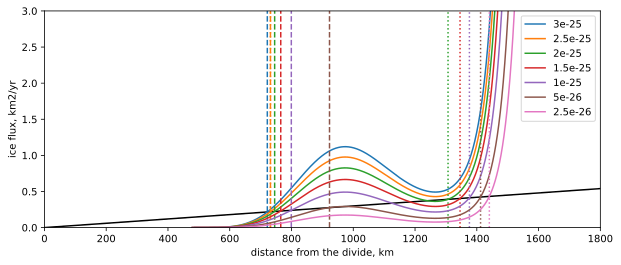

In [13]:
fig = plt.figure(13,figsize=(10,4))
ax = fig.add_subplot(1,1,1)

# ice flux uH = ax
qflux = M() * x  #* spa  m2/s
qflux_scale = qflux * spa*1e-6 #km2/yr

#thk = thickness(experiment, step, x(mode))[1]
#uvel = qflux / thk  #m/s

ax.plot(xkm, qflux_scale, color='k')

r = rhoi / rhosw
h_gr = r ** (-1.) * (-topg-sl)
rho_g = rhoi * g()

# Values of A to be used in MISMIP experiment 3a.
A3a = np.array([3.0e-25, 2.5e-25, 2.0e-25,
                    1.5e-25, 1.0e-25, 5.0e-26,
                    2.5e-26, 5.0e-26, 1.0e-25,
                    1.5e-25, 2.0e-25, 2.5e-25,
                    3.0e-25])


xi1=900.0
xi2=1370.0
sl=0.0

for s in range(0,7): 
    
    qschoof = (A3a[s] * (rho_g)**(n()+1.0) * (1.0 - r)**n() / (4.0**n() * Csl) )**(1.0/(m()+1.0)) 
    qschoof *= h_gr**((m()+n()+3.0)/(m()+1.0)) * spa*1e-6

    #######################################################

    ax.plot(xkm, qschoof,color="C"+str(s),label=str(A3a[s])) #color='C1'
    ax.axvline(x_g(sl, xi1, A3a[s])*1e-3,color="C"+str(s),ls='dashed')
    ax.axvline(x_g(sl, xi2, A3a[s])*1e-3,color="C"+str(s),ls='dotted')
  
ax.set_xlabel('distance from the divide, km')
ax.set_ylabel('ice flux, km2/yr')
_, _, ymin, ymax = ax.axis(xmin=0, xmax=xkm.max())
ax.set_ylim(0,3) #km2/yr
plt.legend()

Notes
<!--

### Publish notebook

```
scp /home/albrecht/Experiments/jupyter/exercises_icesheet_modeling.ipynb albrecht@cluster.pik-potsdam.de:/home/albrecht/www/notebooks/summerschool/
see https://nbviewer.jupyter.org/url/www.pik-potsdam.de/~albrecht/notebooks/summerschool/exercises_icesheet_modeling.ipynb
```
-->